# Concevez une application au service de la santé publique

L'agence Santé publique France a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

# Sommaire

- **Partie 1:** <a href="#C1">Importation des données</a>
- **Partie 2:** <a href="#C2">Exploration des données</a>
    - <a href="#C3">Analyses Univariées</a>
    - <a href="#C4">Analyses Bivariées</a>
    - <a href="#C5">Analyses multivariées</a>

# <a name="C1">Partie 1: Importation des données</a>
Les données utilisées sont considérées être dans le même dossier que ce notebook. Importons dans un premier temps les librairies qui vont nous servir pour l'importation et l'exploration du jeu de données.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp
import scipy.stats as stats
from sklearn import decomposition
from sklearn import preprocessing
from functions import * #module provenant d'openclassrooms pour l'affichage de graphiques pour l'ACP

In [6]:
data_original = pd.read_csv('dataNettoye.csv',sep='\t',encoding='utf-8')
data = data_original.copy()
data.head()

C:\Users\vbour\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,21,25,26,27,28,29,36,37,38,39,40,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0,3087.0,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN
1,1,4530.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,14.0,14.0
2,2,4559.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,0.0,0.0
3,3,16087.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,12.0,12.0
4,4,16094.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN


In [8]:
data.rename(columns = {'saturated-fat_100g':'saturated_fat_100g', 'fruits-vegetables-nuts_100g':'fruits_vegetables_nuts_100g'}, 
            inplace=True)

# <a name="C2">Partie 2: Exploration des données</a>
Maintenant que notre jeu de données est nettoyé, on va pouvoir analyser plus en détails les différentes varaibles.
## <a name="C3">2.1 Analyses Univariées</a>
La première étape va être de regarder une à une les varibales qui nous intéressent. 
### 2.1.1 Variable qualitative ordinale
Commençons par exemple avec la varibale `nutrition_grade_fr`, qui est une varibale qualitative dont les modalités sont ordonnées, dans l'ordre croissant, de **E** à **A**. 

In [3]:
data['nutrition_grade_fr'].describe()

count     320723
unique         5
top            b
freq      149930
Name: nutrition_grade_fr, dtype: object

Ce qui nous intéresse tout d'abord est d'évaluer la proportion de chaque modalité sous forme de tableau

In [4]:
effectifs = data['nutrition_grade_fr'].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

# création du tableau à partir des modalités
tab = pd.DataFrame(modalites, columns = ['nutriscore']) 
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data)

display(tab)

,nutriscore,n,f
0,b,149930,0.467475
1,d,95306,0.297160
2,c,39072,0.121825
3,e,36412,0.113531
4,a,3,0.000009


On peut maintenant visualiser ces différentes proportions sous forme de graphiques.

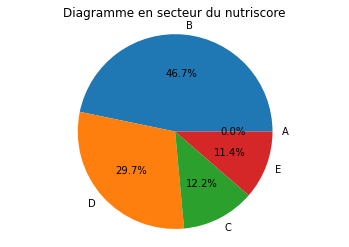

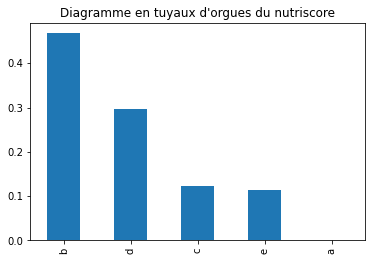

In [5]:
# Diagramme en secteurs
plt.pie(data['nutrition_grade_fr'].value_counts(normalize=True), labels=['B', 'D', 'C', 'E', 'A'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Diagramme en secteur du nutriscore')
plt.show()

# Diagramme en tuyaux d'orgues
data['nutrition_grade_fr'].value_counts(normalize=True).plot(kind='bar')
plt.title("Diagramme en tuyaux d'orgues du nutriscore")
plt.show()

On peut voir grâce à ces graphiques que la majorité des produits, représentant à peu près la moitié des produits, ont un nutriscore **B**, et l'autre moitié des produits à un nutriscore plutôt mauvais, entre **C** et **E**.

### 2.1.2 Variables qualitatives nominales
Une autre idée de notre application est de pouvoir indiquer dans quel régime alimentaire particulier peut être consommé un produit donné. On peut pour cela utiliser les variables qualitatives nominales `categories_fr` et `product_name`.

In [6]:
data['product_name'].describe()

count          320723
unique         221347
top       Pinto Beans
freq            15773
Name: product_name, dtype: object

In [7]:
effectifs = data['product_name'].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

# création du tableau à partir des modalités
tab = pd.DataFrame(modalites, columns = ['Produit']) 
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data)

tab.head(10)

,Produit,n,f
0,Pinto Beans,15773,0.049180
1,Ice Cream,1416,0.004415
2,Extra Virgin Olive Oil,954,0.002975
3,Potato Chips,775,0.002416
4,Premium Ice Cream,226,0.000705
5,Tomato Ketchup,182,0.000567
6,Beef Jerky,167,0.000521
7,Popcorn,157,0.000490
8,Cookies,155,0.000483
9,Salsa,150,0.000468


Le tableau des effectifs et fréquences pour la variable `product_name` semble bien en accord avec les résultats obtenus plus haut: les haricots et l'huile d'olive sont des produits sains, mais les autres produits sont plutôt gras et sucrés et ont donc un nutriscore faible. 

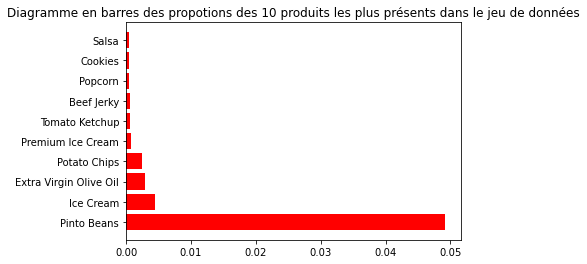

In [8]:
plt.barh(y=tab.iloc[:10,0], width=tab.iloc[:10,2], color='red')
plt.title('Diagramme en barres des propotions des 10 produits les plus présents dans le jeu de données')
plt.show()

In [9]:
data['categories_fr'].describe()

count                                   320723
unique                                   21144
top       Boissons,Boissons alcoolisées,Bières
freq                                    104657
Name: categories_fr, dtype: object

In [10]:
effectifs = data['categories_fr'].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

# création du tableau à partir des modalités
tab = pd.DataFrame(modalites, columns = ['Catégorie de produit']) 
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data)

tab.head(10)

,Catégorie de produit,n,f
0,"Boissons,Boissons alcoolisées,Bières",104657,0.326316
1,"Aliments et boissons à base de végétaux,Alimen...",74895,0.233519
2,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",30371,0.094695
3,"Snacks sucrés,Chocolats,Chocolats noirs",28149,0.087767
4,"Snacks sucrés,Biscuits et gâteaux,Biscuits",802,0.002501
5,"Snacks sucrés,Confiseries,Bonbons",526,0.001640
6,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...",465,0.001450
7,"Snacks salés,Apéritif,Biscuits apéritifs",449,0.001400
8,"Produits laitiers,Yaourts",430,0.001341
9,"Snacks sucrés,Chocolats,Chocolats au lait",429,0.001338


### 2.1.3 Variables quantitatives continues
Les variables `saturated-fat_100g`, `sugars_100g`, `fiber_100g`, `proteins_100g`, `sodium_100g`, `fruits-vegetables-nuts_100g` sont des variables quantitatives continues. Pour les représenter, on peut les discrétiser en classes de largeur 10g. 

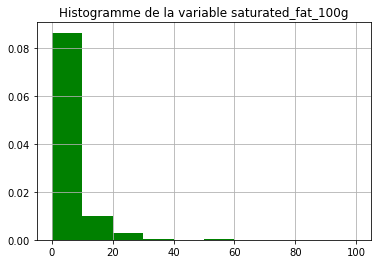

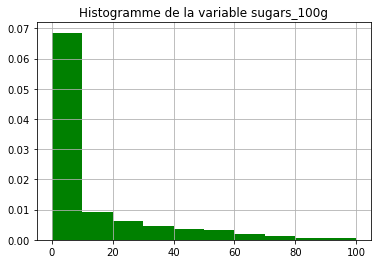

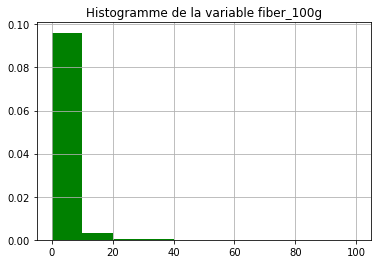

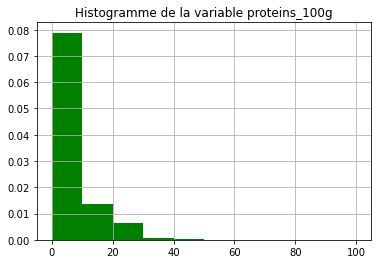

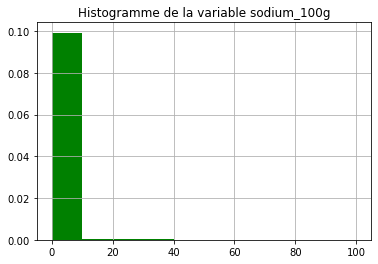

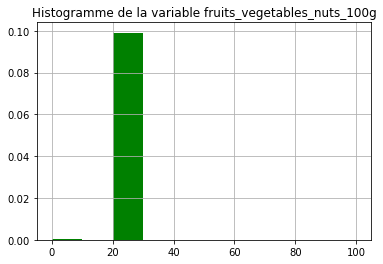

In [34]:
listeVariables = ['saturated_fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 
                  'fruits_vegetables_nuts_100g']

for variable in listeVariables:
    # Histogramme
    data[variable].hist(density=True, color='green', bins=10)
    plt.title('Histogramme de la variable ' + variable)
    plt.show()


On voit que pour les nutriments considérés, la teneur est majoritairement comprise entre 0g et 10g. Pour la teneur en fruits et légumes il faut garder en tête que le jeu de données initial comportait beaucoup de valeurs manquantes qui ont été remplacées par la valeur médiane. L'histogramme qui en résulte est très probablement biaisé.

## <a name="C4">2.2 Analyses Bivariées</a>
Pour les analyses bivariées, on va se concentrer sur les variables d'intérêt pour notre idée d'application.

In [9]:
variablesApp = ['product_name', 'categories_fr', 'origins', 'manufacturing_places', 'labels', 'nutrition_grade_fr',
                'pnns_groups_1', 'pnns_groups_2', 'energy_100g', 'saturated_fat_100g', 'sugars_100g', 'fiber_100g', 
                'proteins_100g', 'sodium_100g', 'fruits_vegetables_nuts_100g']
dataApp = data[variablesApp]
dataApp.head()

,product_name,categories_fr,origins,manufacturing_places,labels,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits_vegetables_nuts_100g
0,Farine de blé noir,"Boissons,Boissons alcoolisées,Bières",Inconnu,Inconnu,Inconnu,b,unknown,unknown,1100.0,1.79,5.71,1.5,4.76,0.229,23.0
1,Banana Chips Sweetened (Whole),"Snacks sucrés,Chocolats,Chocolats noirs",Inconnu,Inconnu,Inconnu,e,Sugary snacks,Biscuits and cakes,2243.0,28.57,14.29,3.6,3.57,0.000,23.0
2,Peanuts,"Aliments et boissons à base de végétaux,Alimen...",Inconnu,Inconnu,Inconnu,d,Milk and dairy products,unknown,1941.0,0.00,17.86,7.1,17.86,0.250,23.0
3,Organic Salted Nut Mix,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",Inconnu,Inconnu,Inconnu,c,Cereals and potatoes,unknown,2540.0,5.36,3.57,7.1,17.86,0.482,23.0
4,Organic Polenta,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",Inconnu,Inconnu,Inconnu,c,Cereals and potatoes,unknown,1552.0,1.79,5.71,5.7,8.57,0.229,23.0


### 2.2.1 Régression linéaire
Ce qui nous intéresse dans l'analyse bivariée de variables quantitatives est de trouver des paires de varibales corrélées entre elles. Pour cela on peut commencer par regarder la matrice des correlations que l'on affiche sous forme de heatmap.

<AxesSubplot:>

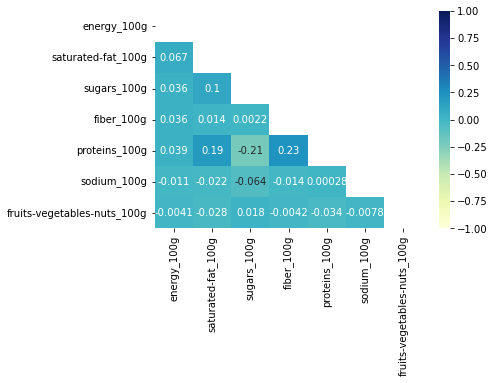

In [13]:
#La matrice de corrélation étant symétrique on peut cacher une moitié
matriceSup = np.triu(dataApp.corr())

sns.heatmap(dataApp.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu', mask=matriceSup

La plupart des coefficients de corrélation sont proches de 0 ce qui indique que les variables sont deux à deux linéairement non corrélées. Pour s'en rendre compte autrement, on peut afficher les nuages de points.

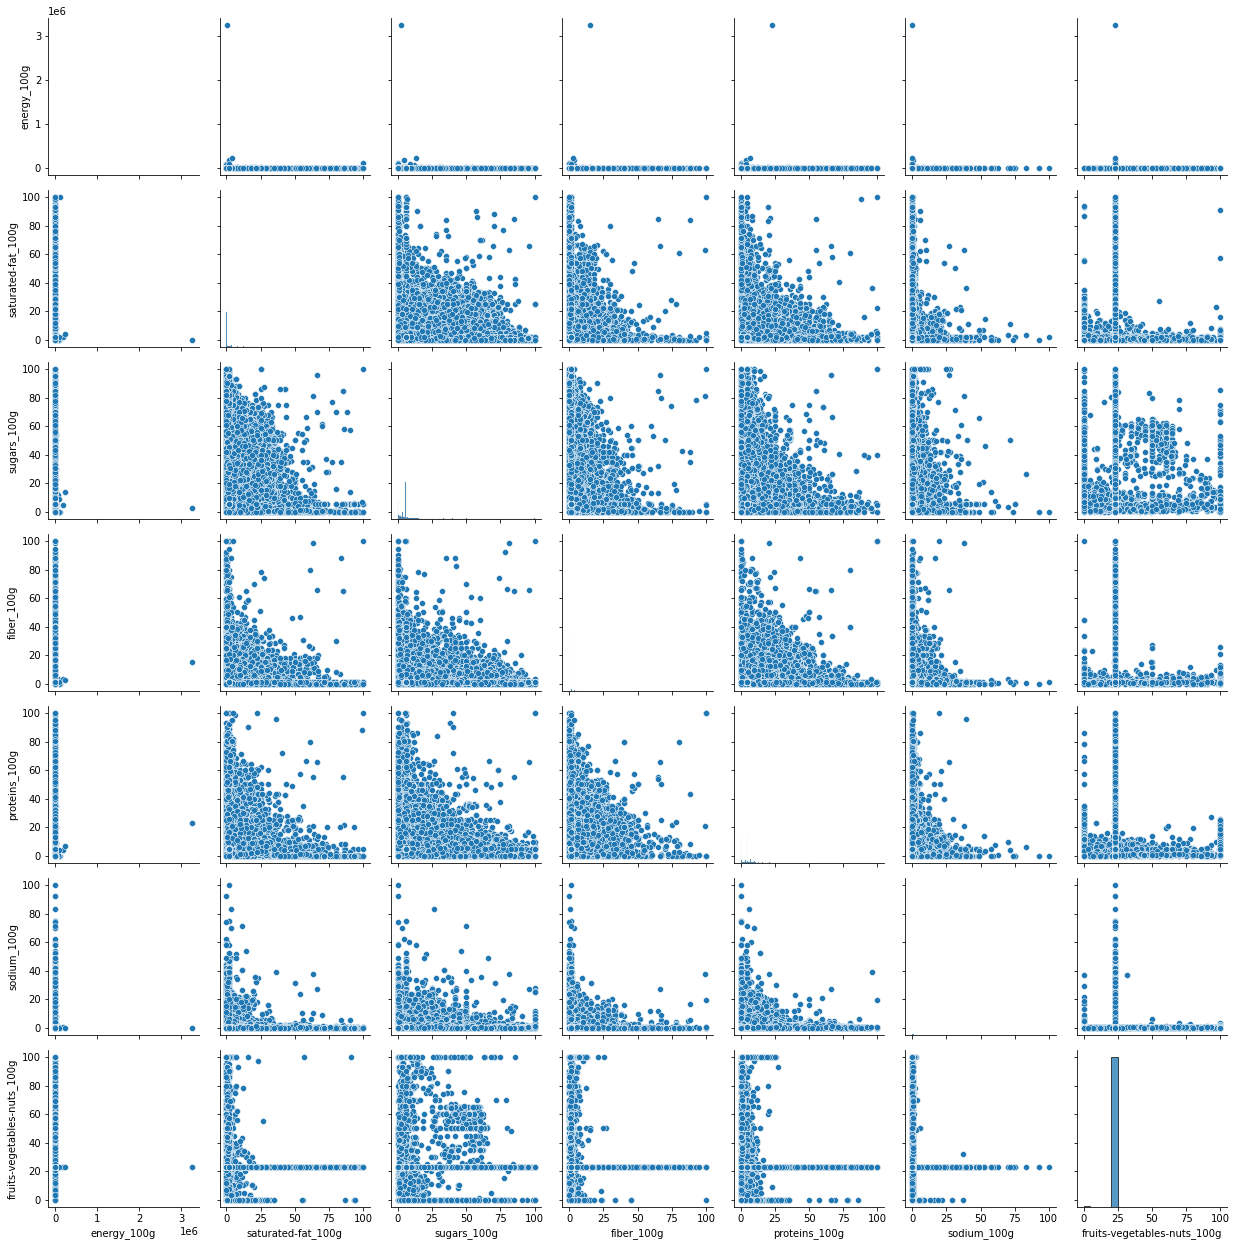

In [14]:
g = sns.PairGrid(dataApp)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

A nouveau on ne décèle aucune correlation linéaire. Majoritairement, pour deux nutriments A et B, on distingue trois types de produit:
- Des quantités A et B équivalentes et faibles
- Une grande quantité A et une petite quantité B
- Ou inversement, une grande quantité A pour une petite quantité B. 

### 2.2.2 Anova
Pour rechercher la corrélation entre le nutriscore et une quantité de nutriment, on peut commencer par afficher le boxplot dudit nutriment pour chaque classe de nutriscore.

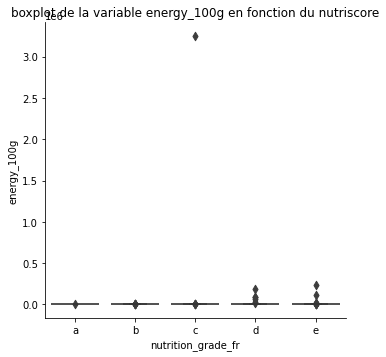

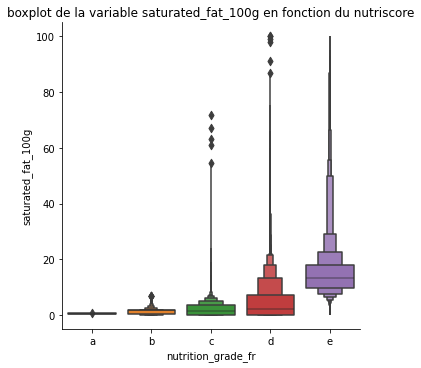

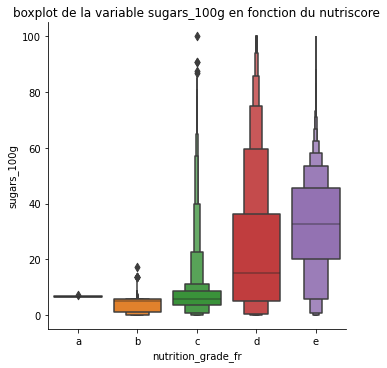

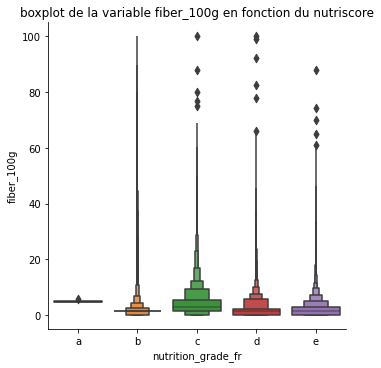

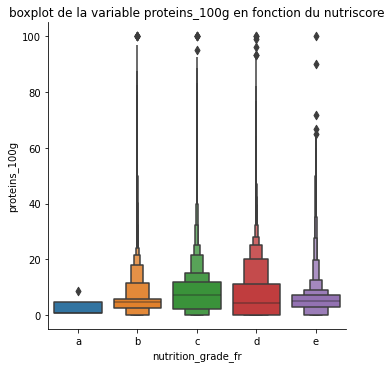

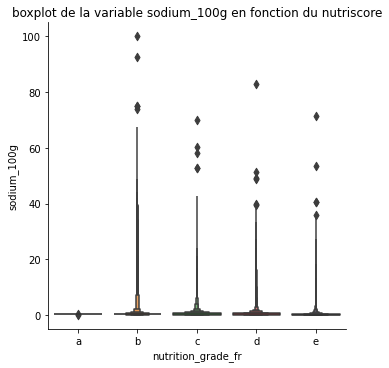

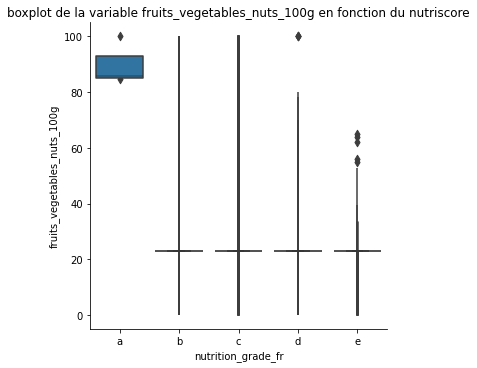

In [50]:
listeVariables = ['energy_100g', 'saturated_fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 
                  'fruits_vegetables_nuts_100g']

for variable in listeVariables:
    #On affiche un boxplot 
    graph = sns.catplot(x='nutrition_grade_fr', y=variable, kind='boxen', data=dataApp, order=['a', 'b', 'c', 'd', 'e'])
    graph.set(title = 'boxplot de la variable '+variable+' en fonction du nutriscore')


Il semblerait qu'il y ait un lien entre le nutriscore et la teneur en sucre et graisses saturées. Pour les autres nutriments, il ne semble pas y avoir de différences significatives entre les cinq niveaux de nutriscore.
Pour s'en convaincre on peut réaliser une ANOVA et calculer le coefficient de corrélation eta.

In [47]:
def anova_table(aov):
    """Fonction permettant de calculer les coefficients eta et omega pour un test ANOVA unidimensionnel"""
    
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [52]:
model = ols('saturated_fat_100g ~ nutrition_grade_fr', data=dataApp).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
nutrition_grade_fr,6.340018e+06,4.0,1.585004e+06,58034.368088,0.0,0.419888,0.41988
Residual,8.759283e+06,320718.0,2.731148e+01,NaN,NaN,NaN,NaN


In [53]:
model = ols('sugars_100g ~ nutrition_grade_fr', data=dataApp).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
nutrition_grade_fr,3.926798e+07,4.0,9.816995e+06,41121.315646,0.0,0.339003,0.338994
Residual,7.656581e+07,320718.0,2.387325e+02,NaN,NaN,NaN,NaN


Les coefficients eta pour les varibales `saturated_fat_100g` et `sugars_100g`, respectivement 0.4 et 0.3, confirment l'existence d'une corrélation avec le nutriscore. Comme on pouvait s'y attendre, plus la teneur en sucre ou graisses saturées est élevée, plus le nutriscore est faible. 

### 2.2.3 Test du chi-2
Le test du chi-2 permet de tester l'indépendence de deux variables qualitatives. Dans notre cas, on souhaite étudier la relation entre la variable `nutrition_grade_fr` et `categories_fr`.
On peut commencer par un bref rappel du contenu de chaque variable.

In [66]:
rp.summary_cat(dataApp[["nutrition_grade_fr", "categories_fr"]]).head(10)

,Variable,Outcome,Count,Percent
0,nutrition_grade_fr,b,149930,46.75
1,,d,95306,29.72
2,,c,39072,12.18
3,,e,36412,11.35
4,,a,3,0.00
5,categories_fr,"Boissons,Boissons alcoolisées,Bières",104657,32.63
6,,"Aliments et boissons à base de végétaux,Alimen...",74895,23.35
7,,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",30371,9.47
8,,"Snacks sucrés,Chocolats,Chocolats noirs",28149,8.78
9,,"Snacks sucrés,Biscuits et gâteaux,Biscuits",802,0.25


In [28]:
crosstab = pd.crosstab(dataApp["categories_fr"], dataApp["nutrition_grade_fr"])
crosstab.head(15)

nutrition_grade_fr,a,b,c,d,e
categories_fr,,,,,
4,0,1,0,0,0
6,0,3,0,0,0
A-code-1,0,1,0,0,0
Ab,0,1,0,0,0
Abats-surgeles,0,1,0,0,0
"Abdijbier,Alcoholische-dranken,Bieren,Bruine-bieren,Dranken,Trappistenbier",0,1,0,0,0
Accras-de-morue,0,3,0,0,0
"Aceitunas,Aceitunas-deshuesadas,Aceitunas-verdes,Aceitunas-verdes-deshuesadas,Encurtidos,Hortalizas,Vegetales-encurtidos",0,1,0,0,0
"Acqua,Acqua-minerale",0,1,0,0,0


In [51]:
#on récupère la catégorie la plus présente pour chaque nutriscore
nutriscore = ['a', 'b', 'c', 'd', 'e']
listeCateg = []

for score in nutriscore:
    maxCount = crosstab[score].max()
    listeCateg.append(list(crosstab[crosstab[score]==maxCount].index))
    
print(listeCateg)

[['Frais,Plats préparés,Légumes préparés,Plats préparés frais,Entrées,Entrées froides,Carottes râpées,Crudites'], ['Boissons,Boissons alcoolisées,Bières'], ["Snacks salés,Apéritif,Chips et frites,Chips,Chips de pommes de terre,Chips de pommes de terre à l'huile de tournesol"], ["Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner"], ['Snacks sucrés,Chocolats,Chocolats noirs']]


In [70]:
stats.chi2_contingency(crosstab)

(902121.910486136,
 0.0,
 84572,
 array([[9.35386611e-06, 4.67475049e-01, 1.21824752e-01, 2.97159854e-01,
         1.13530991e-01],
        [2.80615983e-05, 1.40242515e+00, 3.65474257e-01, 8.91479563e-01,
         3.40592973e-01],
        [9.35386611e-06, 4.67475049e-01, 1.21824752e-01, 2.97159854e-01,
         1.13530991e-01],
        ...,
        [9.35386611e-06, 4.67475049e-01, 1.21824752e-01, 2.97159854e-01,
         1.13530991e-01],
        [2.80615983e-05, 1.40242515e+00, 3.65474257e-01, 8.91479563e-01,
         3.40592973e-01],
        [9.35386611e-06, 4.67475049e-01, 1.21824752e-01, 2.97159854e-01,
         1.13530991e-01]]))

Les trois premières coordonnées de la liste correspondent, dans l'ordre, à la statistique du chi-2, p-valeur et degré de liberté. On peut conclure ici qu'il existe une relation significative entre la catégorie d'un produit et son nutriscore.

## <a name="C5">2.3 Analyses multivariées</a>
### 2.3.1 ACP
On souhaite à présent réaliser une analyse en composantes principales sur notre jeu de données.

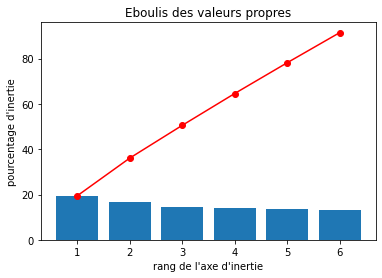

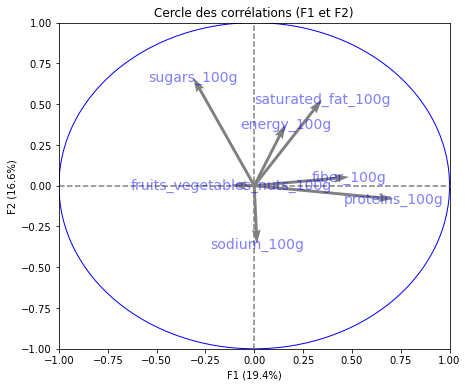

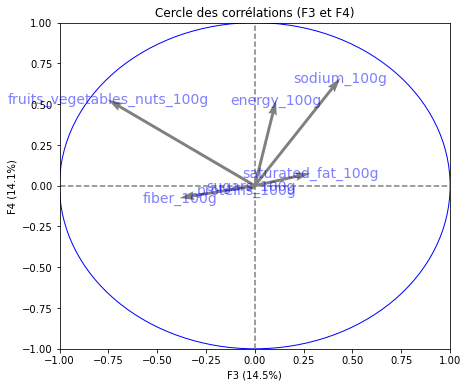

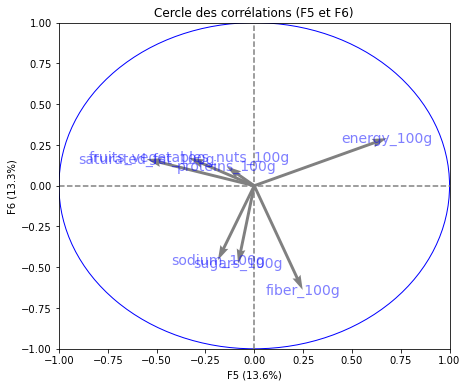

In [17]:
variablesACP = ['energy_100g', 'saturated_fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
                'sodium_100g', 'fruits_vegetables_nuts_100g']

dataACP = data[variablesACP]
n_comp = 6

X = dataACP.values
names = dataApp['nutrition_grade_fr']
features = dataACP.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

plt.show()

On voit tout d'abord sur l'éboulis des valeurs propres que l'inertie totale est équitablement répartie entre les axes. Autrement dit, les variables ne sont pas corrélées entre elles, ce que l'on a déja pu voir avec la matrice des corrélations. Ainsi, pour un individu donné, on ne peut pas se faire une idée de la valeur d'une variable connaissant la valeur des autres variables. Cela ne devrait pas nous étonné pour autant car il s'agit des variables utilisées pour le calcul du nutriscore, et il y a donc du sens à ce qu'elle soient indépendantes.
Sur le cercle des corrélations pour les deux premières composantes on distingue deux groupes de variables:
- `proteins_100g`, `fiber_100g` et `fruits_vegetables_nuts_100g` fortement corrélées à F1
- `sugars_100g`, `sodium_100g`, `energy_100g` et `staurated_fat_100g` fortement corrélées à F2

A nouveau on retrouve les deux groupes de nutriments à favoriser ou éviter qui influent sur le calcul du nutriscore.
On peut imaginer que c'est en réalisant une ACP et en voyant ce type de graphiques que l'idée du nutriscore est apparue.